Caricamento dati...
Shape prima del taglio: (1104, 60, 7)
Shape dopo il taglio (Train): (1104, 60, 6)
Shape piatta Train:    (1104, 360)
Shape piatta Test:     (190, 360)

Addestramento Decision Tree...
Modello salvato in: C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models\best_decision_tree_spy.pkl

Avvio valutazione...
Generazione predizioni per Decision Tree...
--- Risultati Decision Tree ---
MSE: $182.42
RMSE: $13.51
Primo prezzo (Reale): $396.85
Ultimo prezzo (Reale): $476.69


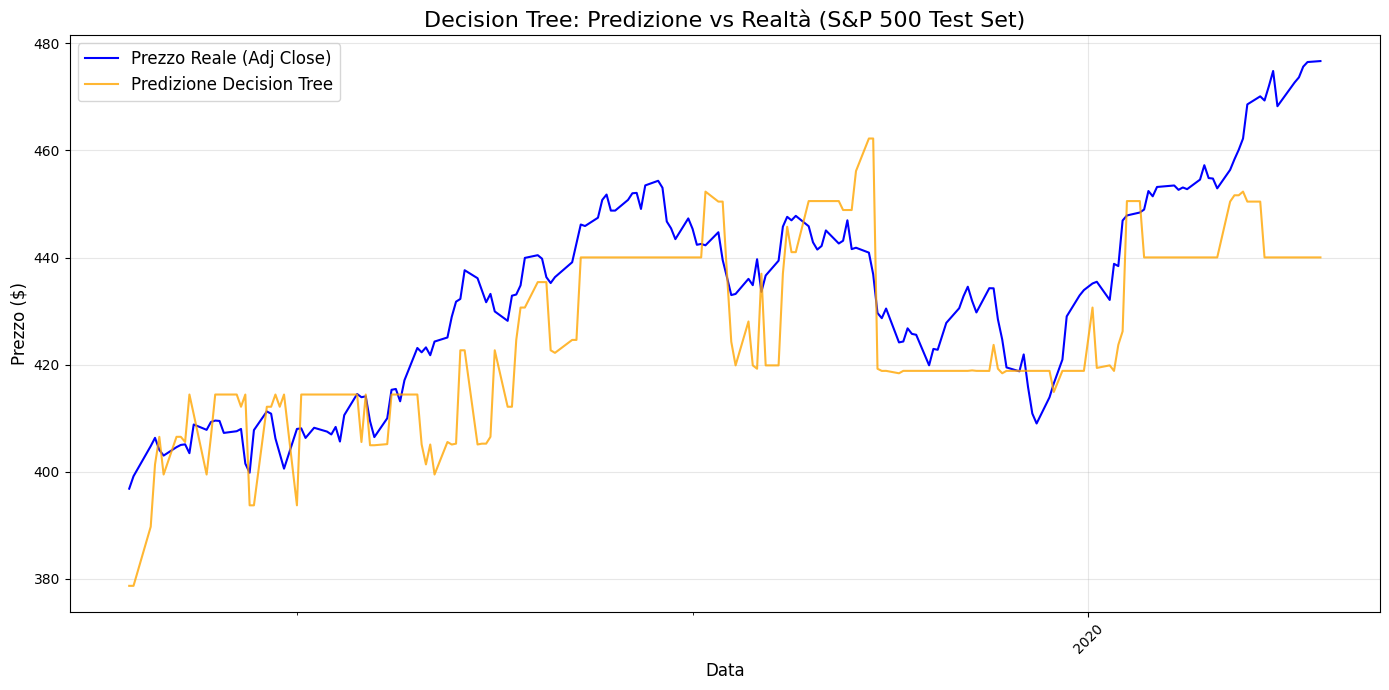

In [ ]:
import sys
import os
import numpy as np
import joblib
from sklearn.tree import DecisionTreeRegressor

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.visualizzazione import evaluate_and_plot

DATA_DIR = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/data_split_titolo' 

MODEL_DIR = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models'
CSV_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/SPY.csv'
SCALER_PATH = os.path.join(DATA_DIR, 'scaler.pkl')
DT_MODEL_PATH = os.path.join(MODEL_DIR, 'best_decision_tree_spy.pkl')

if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

print("Caricamento dati...")
X_train = np.load(os.path.join(DATA_DIR, 'X_train.npy'))
y_train = np.load(os.path.join(DATA_DIR, 'y_train.npy'))
X_test = np.load(os.path.join(DATA_DIR, 'X_test.npy'))
y_test = np.load(os.path.join(DATA_DIR, 'y_test.npy'))


print(f"Shape prima del taglio: {X_train.shape}")

X_train = X_train[:, :, :-1]
X_test  = X_test[:, :, :-1]  

scaler_data = joblib.load(SCALER_PATH)
if isinstance(scaler_data, dict) and 'financial' in scaler_data:
    scaler = scaler_data['financial']
else:
    scaler = scaler_data

print(f"Shape dopo il taglio (Train): {X_train.shape}")
nsamples, nx, ny = X_train.shape 


X_train_flat = X_train.reshape((nsamples, nx*ny))
X_test_flat  = X_test.reshape((X_test.shape[0], nx*ny))

print(f"Shape piatta Train:    {X_train_flat.shape}")
print(f"Shape piatta Test:     {X_test_flat.shape}")

print("\nAddestramento Decision Tree...")
model = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=42)
model.fit(X_train_flat, y_train)

joblib.dump(model, DT_MODEL_PATH)
print(f"Modello salvato in: {DT_MODEL_PATH}")

print("\nAvvio valutazione...")
evaluate_and_plot(
    model=model,
    X_test=X_test_flat,    
    y_test=y_test,
    scaler=scaler,
    csv_path=CSV_PATH,
    model_name='Decision Tree',
    color='orange'        
)